In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CAD_USD_5min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(222650, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,1.29842,1.29845,1.29842,1.29849
2020-01-01 17:05:00,1.29846,1.29857,1.29777,1.29858
2020-01-01 17:10:00,1.29857,1.29803,1.29802,1.29863
2020-01-01 17:15:00,1.29845,1.29800,1.29799,1.29845
2020-01-01 17:20:00,1.29799,1.29816,1.29798,1.29817


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(222649, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,1.29842,1.29845,1.29842,1.29849,1.29857,17,2,1,-0.00003,1.298455,0.00007,1.298445
2020-01-01 17:05:00,1.29846,1.29857,1.29777,1.29858,1.29803,17,2,1,-0.00011,1.298175,0.00081,1.298345
2020-01-01 17:10:00,1.29857,1.29803,1.29802,1.29863,1.29800,17,2,1,0.00054,1.298325,0.00061,1.298312
2020-01-01 17:15:00,1.29845,1.29800,1.29799,1.29845,1.29816,17,2,1,0.00045,1.298220,0.00046,1.298223
2020-01-01 17:20:00,1.29799,1.29816,1.29798,1.29817,1.29816,17,2,1,-0.00017,1.298075,0.00019,1.298075


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,1.29842,1.29845,1.29842,1.29849,1.29857,17,2,1,-0.00003,1.298455,0.00007,1.298445,-25.512621
2020-01-01 17:05:00,1.29846,1.29857,1.29777,1.29858,1.29803,17,2,1,-0.00011,1.298175,0.00081,1.298345,-25.512390
2020-01-01 17:10:00,1.29857,1.29803,1.29802,1.29863,1.29800,17,2,1,0.00054,1.298325,0.00061,1.298312,-25.512390
2020-01-01 17:15:00,1.29845,1.29800,1.29799,1.29845,1.29816,17,2,1,0.00045,1.298220,0.00046,1.298223,-25.512354
2020-01-01 17:20:00,1.29799,1.29816,1.29798,1.29817,1.29816,17,2,1,-0.00017,1.298075,0.00019,1.298075,-25.512390


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.29842  1.29842  1.29849         1.29857    17    2   
2020-01-01 17:05:00  1.29846  1.29777  1.29858         1.29803    17    2   
2020-01-01 17:10:00  1.29857  1.29802  1.29863         1.29800    17    2   
2020-01-01 17:15:00  1.29845  1.29799  1.29845         1.29816    17    2   
2020-01-01 17:20:00  1.29799  1.29798  1.29817         1.29816    17    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00003   1.298455  0.00007    1.298445 -25.512621  
2020-01-01 17:05:00     1  -0.00011   1.298175  0.00081    1.298345 -25.512390  
2020-01-01 17:10:00     1   0.00054   1.298325  0.00061    1.298312 -25.512390  
2020-01-01 17:15:00     1   0.00045   1.298220  0.00046

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_5Min(X,y)

178119
178119
22000
22000
22530
22530


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape

(178119, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(178094, 24, 12)
(21975, 24, 12)
(22505, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(178094, 1)
(21975, 1)
(22505, 1)


array([[0.3637457 ],
       [0.36404705],
       [0.36449957],
       ...,
       [0.29631567],
       [0.29725742],
       [0.29838753]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.3637457 , 0.36404705, 0.36449957, ..., 0.29631567, 0.29725742,
       0.29838753], dtype=float32)

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 24, 256)           275456    
                                                                 
 lstm_4 (LSTM)               (None, 24, 64)            82176     
                                                                 
 dropout_1 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 16)                5184      
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CAD_USD5_LSTM", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=60
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/60
463/463 [==============================] - ETA: 0s - loss: 390.8275 - mae: 4.4469 - mse: 390.8275 - root_mean_squared_error: 19.7694 - mape: 20600.2090
Epoch 1: val_mse improved from inf to 0.07227, saving model to /content/drive/MyDrive/modelweights/CAD_USD5_LSTM


463/463 [==============================] - 217s 455ms/step - loss: 390.8275 - mae: 4.4469 - mse: 390.8275 - root_mean_squared_error: 19.7694 - mape: 20600.2090 - val_loss: 0.0723 - val_mae: 0.2333 - val_mse: 0.0723 - val_root_mean_squared_error: 0.2688 - val_mape: 15670.7090
Epoch 2/60
463/463 [==============================] - ETA: 0s - loss: 0.0388 - mae: 0.1578 - mse: 0.0388 - root_mean_squared_error: 0.1969 - mape: 2106.2559
Epoch 2: val_mse did not improve from 0.07227
463/463 [==============================] - 202s 437ms/step - loss: 0.0388 - mae: 0.1578 - mse: 0.0388 - root_mean_squared_error: 0.1969 - mape: 2106.2559 - val_loss: 0.0784 - val_mae: 0.2451 - val_mse: 0.0784 - val_root_mean_squared_error: 0.2801 - val_mape: 14925.6094
Epoch 3/60
463/463 [==============================] - ETA: 0s - loss: 0.0388 - mae: 0.1572 - mse: 0.0388 - root_mean_squared_error: 0.1970 - mape: 2368.3313
Epoch 3: val_mse did not improve from 0.07227
463/463 [==============================] - 203s 

463/463 [==============================] - 214s 462ms/step - loss: 0.0384 - mae: 0.1569 - mse: 0.0384 - root_mean_squared_error: 0.1959 - mape: 1965.9993 - val_loss: 0.0722 - val_mae: 0.2331 - val_mse: 0.0722 - val_root_mean_squared_error: 0.2687 - val_mape: 15675.1729
Epoch 17/60
463/463 [==============================] - ETA: 0s - loss: 0.0382 - mae: 0.1567 - mse: 0.0382 - root_mean_squared_error: 0.1956 - mape: 2152.2034
Epoch 17: val_mse did not improve from 0.07217
463/463 [==============================] - 211s 455ms/step - loss: 0.0382 - mae: 0.1567 - mse: 0.0382 - root_mean_squared_error: 0.1956 - mape: 2152.2034 - val_loss: 0.0776 - val_mae: 0.2436 - val_mse: 0.0776 - val_root_mean_squared_error: 0.2786 - val_mape: 15011.1221
Epoch 18/60
463/463 [==============================] - ETA: 0s - loss: 0.0382 - mae: 0.1568 - mse: 0.0382 - root_mean_squared_error: 0.1954 - mape: 2008.3578
Epoch 18: val_mse improved from 0.07217 to 0.06925, saving model to /content/drive/MyDrive/modelw

463/463 [==============================] - 220s 475ms/step - loss: 0.0382 - mae: 0.1568 - mse: 0.0382 - root_mean_squared_error: 0.1954 - mape: 2008.3578 - val_loss: 0.0692 - val_mae: 0.2273 - val_mse: 0.0692 - val_root_mean_squared_error: 0.2632 - val_mape: 16048.5732
Epoch 19/60
463/463 [==============================] - ETA: 0s - loss: 0.0381 - mae: 0.1568 - mse: 0.0381 - root_mean_squared_error: 0.1952 - mape: 2128.8552
Epoch 19: val_mse did not improve from 0.06925
463/463 [==============================] - 225s 486ms/step - loss: 0.0381 - mae: 0.1568 - mse: 0.0381 - root_mean_squared_error: 0.1952 - mape: 2128.8552 - val_loss: 0.0721 - val_mae: 0.2329 - val_mse: 0.0721 - val_root_mean_squared_error: 0.2684 - val_mape: 15680.4277
Epoch 20/60
463/463 [==============================] - ETA: 0s - loss: 0.0380 - mae: 0.1567 - mse: 0.0380 - root_mean_squared_error: 0.1949 - mape: 2000.8754
Epoch 20: val_mse did not improve from 0.06925
463/463 [==============================] - 218s 47

463/463 [==============================] - 235s 507ms/step - loss: 0.0371 - mae: 0.1545 - mse: 0.0371 - root_mean_squared_error: 0.1925 - mape: 1945.5898 - val_loss: 0.0641 - val_mae: 0.2182 - val_mse: 0.0641 - val_root_mean_squared_error: 0.2531 - val_mape: 14955.8896
Epoch 22/60
463/463 [==============================] - ETA: 0s - loss: 0.0326 - mae: 0.1406 - mse: 0.0326 - root_mean_squared_error: 0.1805 - mape: 1194.6289
Epoch 22: val_mse did not improve from 0.06406
463/463 [==============================] - 220s 475ms/step - loss: 0.0326 - mae: 0.1406 - mse: 0.0326 - root_mean_squared_error: 0.1805 - mape: 1194.6289 - val_loss: 0.0762 - val_mae: 0.2409 - val_mse: 0.0762 - val_root_mean_squared_error: 0.2760 - val_mape: 15173.9268
Epoch 23/60
463/463 [==============================] - ETA: 0s - loss: 0.0382 - mae: 0.1567 - mse: 0.0382 - root_mean_squared_error: 0.1954 - mape: 2530.3865
Epoch 23: val_mse did not improve from 0.06406
463/463 [==============================] - 219s 47

463/463 [==============================] - 227s 490ms/step - loss: 0.0103 - mae: 0.0701 - mse: 0.0103 - root_mean_squared_error: 0.1016 - mape: 1388.3826 - val_loss: 0.0018 - val_mae: 0.0301 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0421 - val_mape: 6235.9307
Epoch 27/60
463/463 [==============================] - ETA: 0s - loss: 0.0021 - mae: 0.0341 - mse: 0.0021 - root_mean_squared_error: 0.0455 - mape: 700.4874
Epoch 27: val_mse improved from 0.00177 to 0.00088, saving model to /content/drive/MyDrive/modelweights/CAD_USD5_LSTM


463/463 [==============================] - 223s 482ms/step - loss: 0.0021 - mae: 0.0341 - mse: 0.0021 - root_mean_squared_error: 0.0455 - mape: 700.4874 - val_loss: 8.8282e-04 - val_mae: 0.0209 - val_mse: 8.8282e-04 - val_root_mean_squared_error: 0.0297 - val_mape: 5016.7720
Epoch 28/60
463/463 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0272 - mse: 0.0013 - root_mean_squared_error: 0.0360 - mape: 681.3781
Epoch 28: val_mse improved from 0.00088 to 0.00086, saving model to /content/drive/MyDrive/modelweights/CAD_USD5_LSTM


463/463 [==============================] - 228s 493ms/step - loss: 0.0013 - mae: 0.0272 - mse: 0.0013 - root_mean_squared_error: 0.0360 - mape: 681.3781 - val_loss: 8.5718e-04 - val_mae: 0.0224 - val_mse: 8.5718e-04 - val_root_mean_squared_error: 0.0293 - val_mape: 4186.3027
Epoch 29/60
463/463 [==============================] - ETA: 0s - loss: 9.8436e-04 - mae: 0.0238 - mse: 9.8436e-04 - root_mean_squared_error: 0.0314 - mape: 510.8622
Epoch 29: val_mse improved from 0.00086 to 0.00052, saving model to /content/drive/MyDrive/modelweights/CAD_USD5_LSTM


463/463 [==============================] - 232s 501ms/step - loss: 9.8436e-04 - mae: 0.0238 - mse: 9.8436e-04 - root_mean_squared_error: 0.0314 - mape: 510.8622 - val_loss: 5.2473e-04 - val_mae: 0.0167 - val_mse: 5.2473e-04 - val_root_mean_squared_error: 0.0229 - val_mape: 3764.4319
Epoch 30/60
463/463 [==============================] - ETA: 0s - loss: 7.3340e-04 - mae: 0.0207 - mse: 7.3340e-04 - root_mean_squared_error: 0.0271 - mape: 502.6053
Epoch 30: val_mse improved from 0.00052 to 0.00046, saving model to /content/drive/MyDrive/modelweights/CAD_USD5_LSTM


463/463 [==============================] - 231s 498ms/step - loss: 7.3340e-04 - mae: 0.0207 - mse: 7.3340e-04 - root_mean_squared_error: 0.0271 - mape: 502.6053 - val_loss: 4.6364e-04 - val_mae: 0.0158 - val_mse: 4.6364e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 3330.8599
Epoch 31/60
463/463 [==============================] - ETA: 0s - loss: 5.9457e-04 - mae: 0.0186 - mse: 5.9457e-04 - root_mean_squared_error: 0.0244 - mape: 293.9937
Epoch 31: val_mse did not improve from 0.00046
463/463 [==============================] - 228s 492ms/step - loss: 5.9457e-04 - mae: 0.0186 - mse: 5.9457e-04 - root_mean_squared_error: 0.0244 - mape: 293.9937 - val_loss: 6.6974e-04 - val_mae: 0.0205 - val_mse: 6.6974e-04 - val_root_mean_squared_error: 0.0259 - val_mape: 2912.3535
Epoch 32/60
463/463 [==============================] - ETA: 0s - loss: 4.9388e-04 - mae: 0.0170 - mse: 4.9388e-04 - root_mean_squared_error: 0.0222 - mape: 339.6278
Epoch 32: val_mse improved from 0.00046 to 0.00043, sav

463/463 [==============================] - 241s 520ms/step - loss: 4.9388e-04 - mae: 0.0170 - mse: 4.9388e-04 - root_mean_squared_error: 0.0222 - mape: 339.6278 - val_loss: 4.3375e-04 - val_mae: 0.0151 - val_mse: 4.3375e-04 - val_root_mean_squared_error: 0.0208 - val_mape: 2617.6104
Epoch 33/60
463/463 [==============================] - ETA: 0s - loss: 3.9101e-04 - mae: 0.0151 - mse: 3.9101e-04 - root_mean_squared_error: 0.0198 - mape: 166.6465
Epoch 33: val_mse did not improve from 0.00043
463/463 [==============================] - 224s 483ms/step - loss: 3.9101e-04 - mae: 0.0151 - mse: 3.9101e-04 - root_mean_squared_error: 0.0198 - mape: 166.6465 - val_loss: 5.2896e-04 - val_mae: 0.0175 - val_mse: 5.2896e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 2286.1021
Epoch 34/60
463/463 [==============================] - ETA: 0s - loss: 3.5068e-04 - mae: 0.0143 - mse: 3.5068e-04 - root_mean_squared_error: 0.0187 - mape: 251.2011
Epoch 34: val_mse did not improve from 0.00043
463/463 

463/463 [==============================] - 237s 512ms/step - loss: 2.6597e-04 - mae: 0.0124 - mse: 2.6597e-04 - root_mean_squared_error: 0.0163 - mape: 240.7676 - val_loss: 4.0954e-04 - val_mae: 0.0146 - val_mse: 4.0954e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 1822.5601
Epoch 36/60
463/463 [==============================] - ETA: 0s - loss: 3.1394e-04 - mae: 0.0130 - mse: 3.1394e-04 - root_mean_squared_error: 0.0177 - mape: 124.7517
Epoch 36: val_mse did not improve from 0.00041
463/463 [==============================] - 213s 461ms/step - loss: 3.1394e-04 - mae: 0.0130 - mse: 3.1394e-04 - root_mean_squared_error: 0.0177 - mape: 124.7517 - val_loss: 4.3526e-04 - val_mae: 0.0151 - val_mse: 4.3526e-04 - val_root_mean_squared_error: 0.0209 - val_mape: 1681.1516
Epoch 37/60
463/463 [==============================] - ETA: 0s - loss: 1.9598e-04 - mae: 0.0107 - mse: 1.9598e-04 - root_mean_squared_error: 0.0140 - mape: 132.8817
Epoch 37: val_mse did not improve from 0.00041
463/463 

463/463 [==============================] - 211s 456ms/step - loss: 6.6270e-05 - mae: 0.0061 - mse: 6.6270e-05 - root_mean_squared_error: 0.0081 - mape: 82.5865 - val_loss: 4.0024e-04 - val_mae: 0.0147 - val_mse: 4.0024e-04 - val_root_mean_squared_error: 0.0200 - val_mape: 716.3203


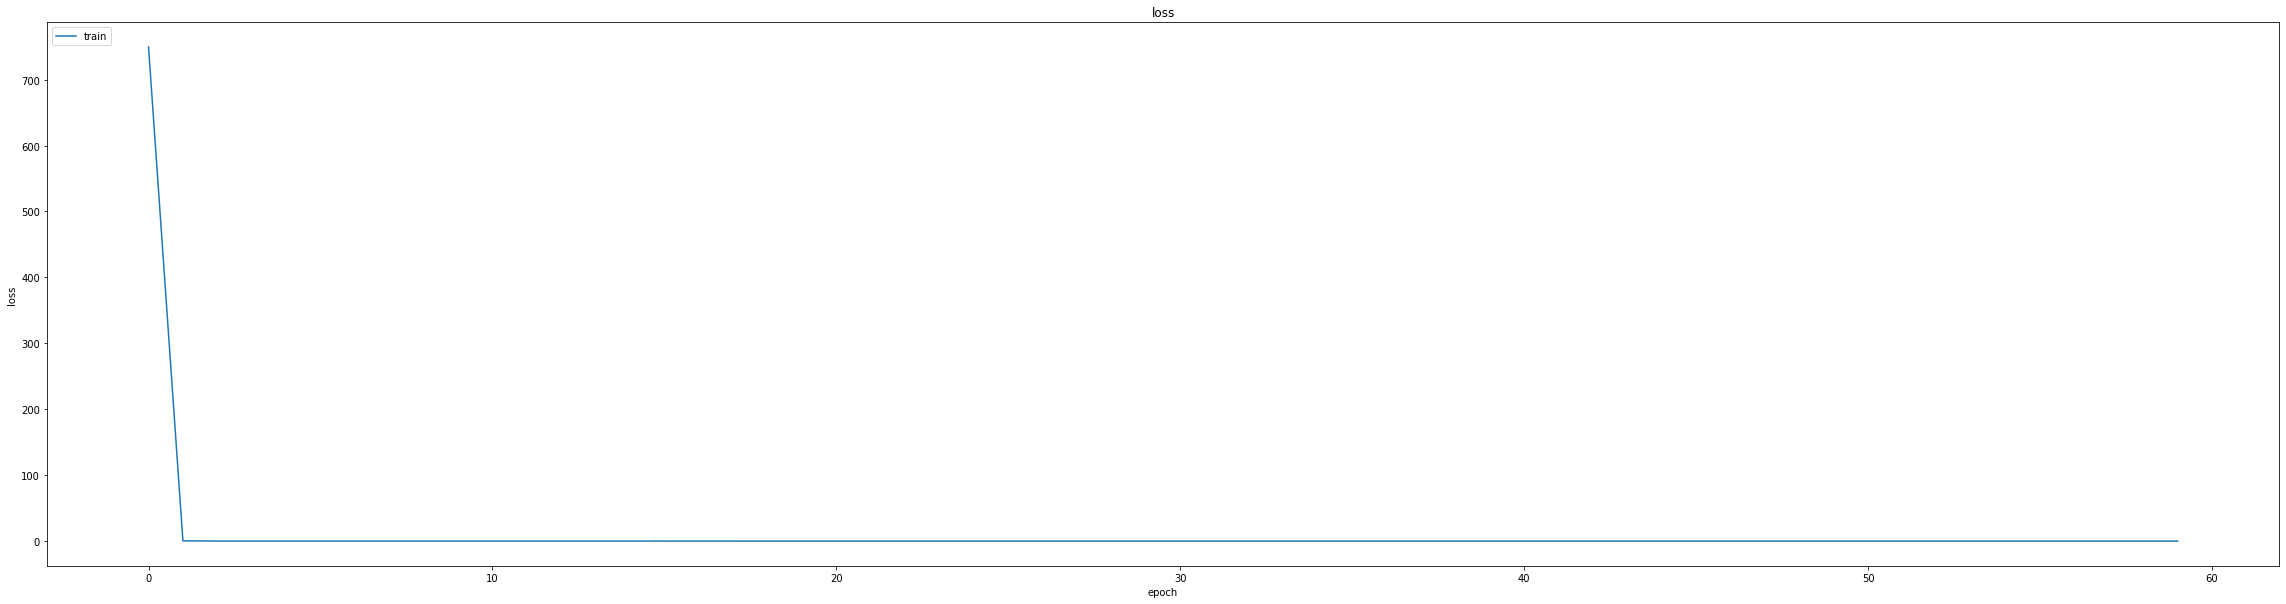

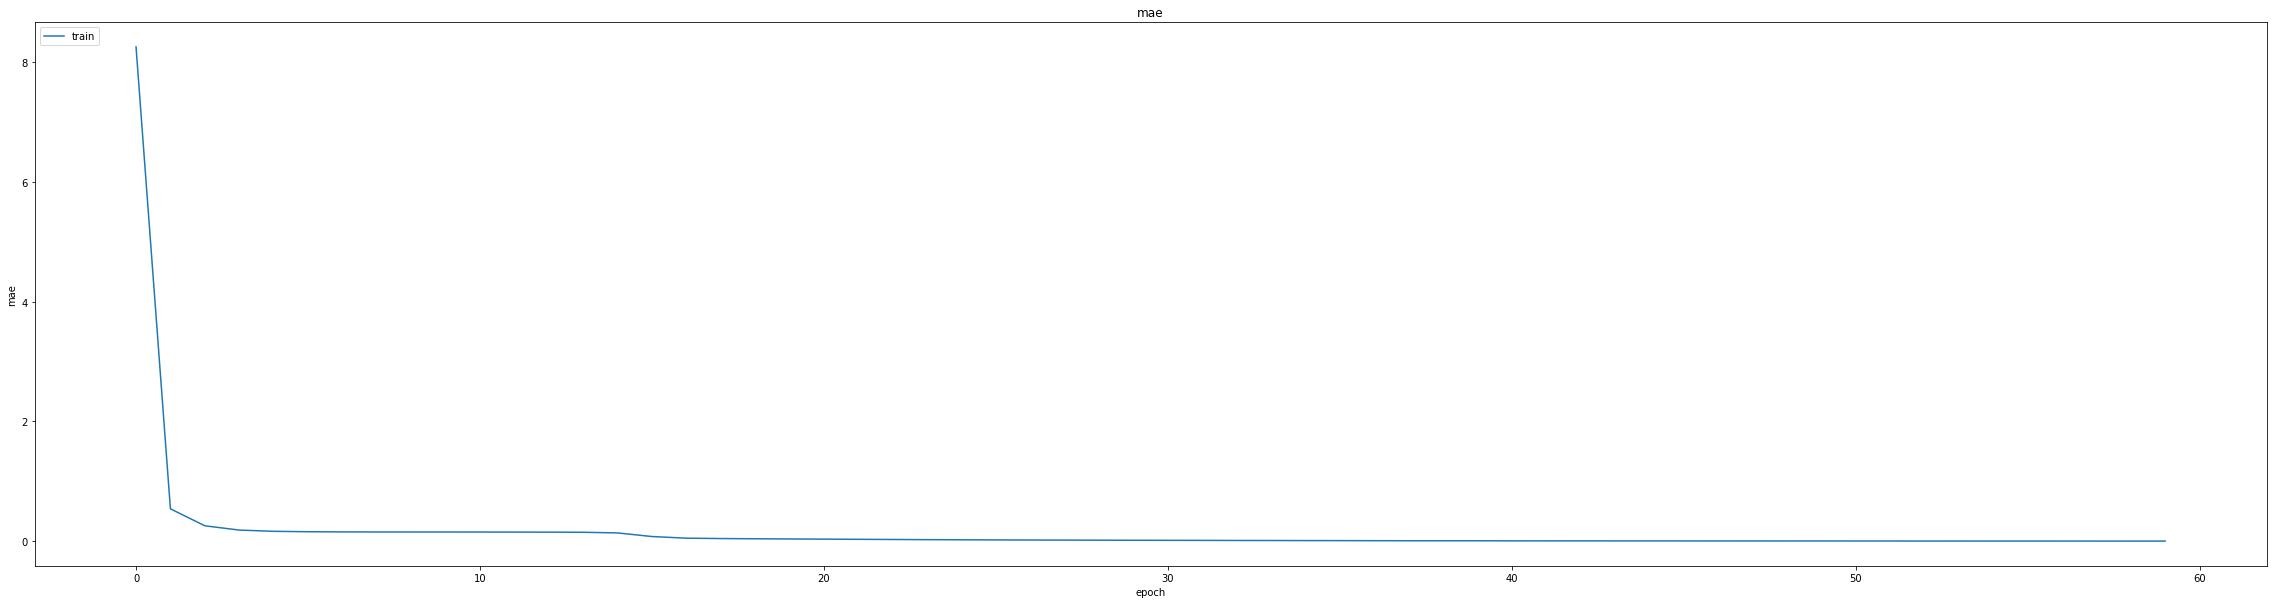

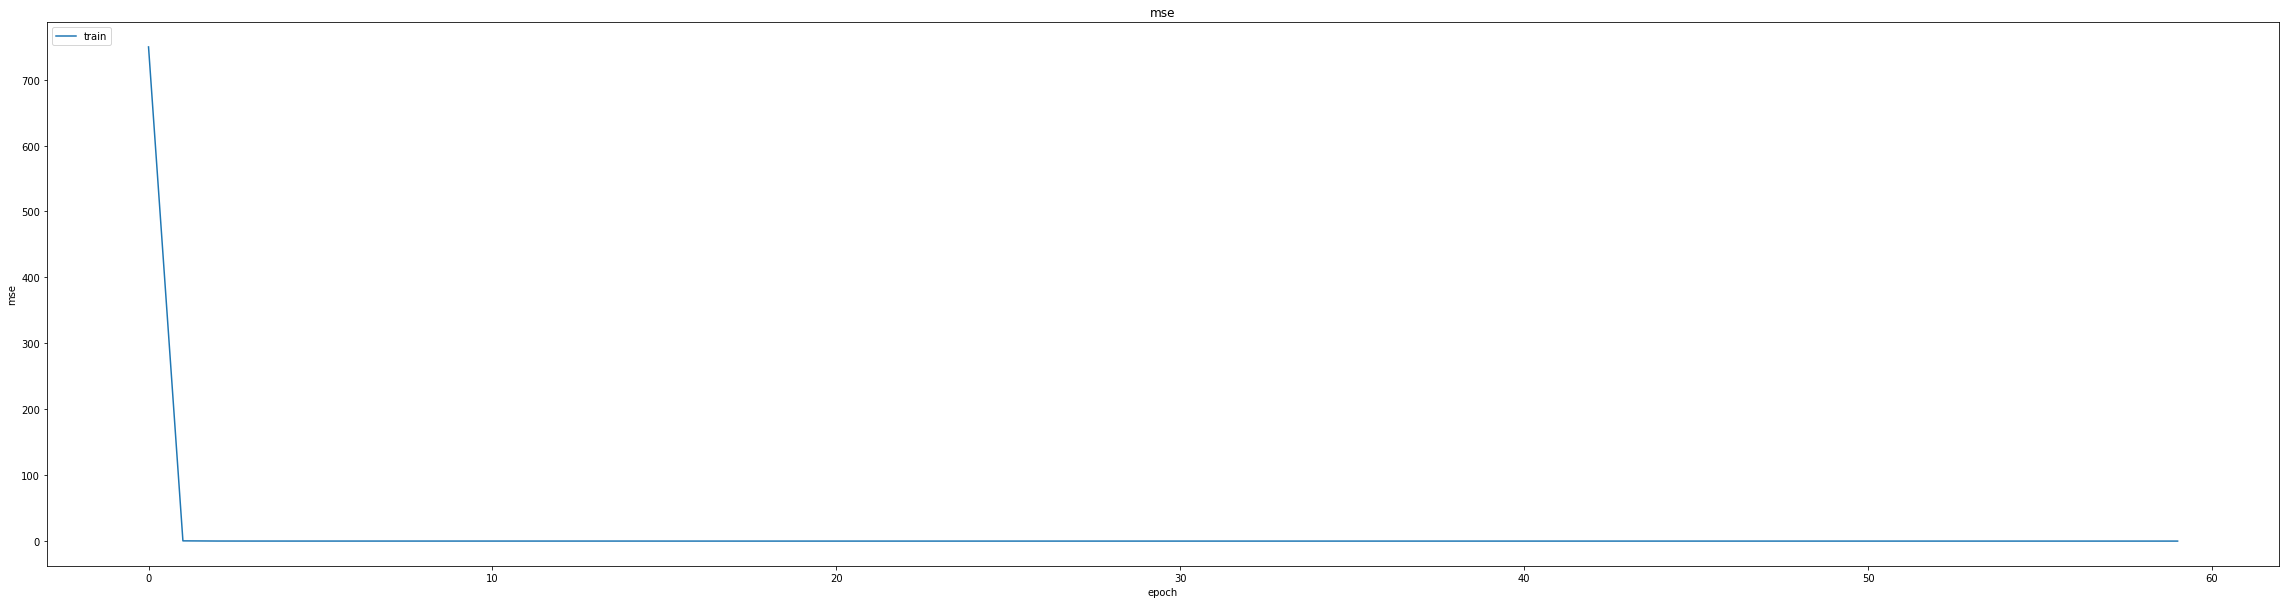

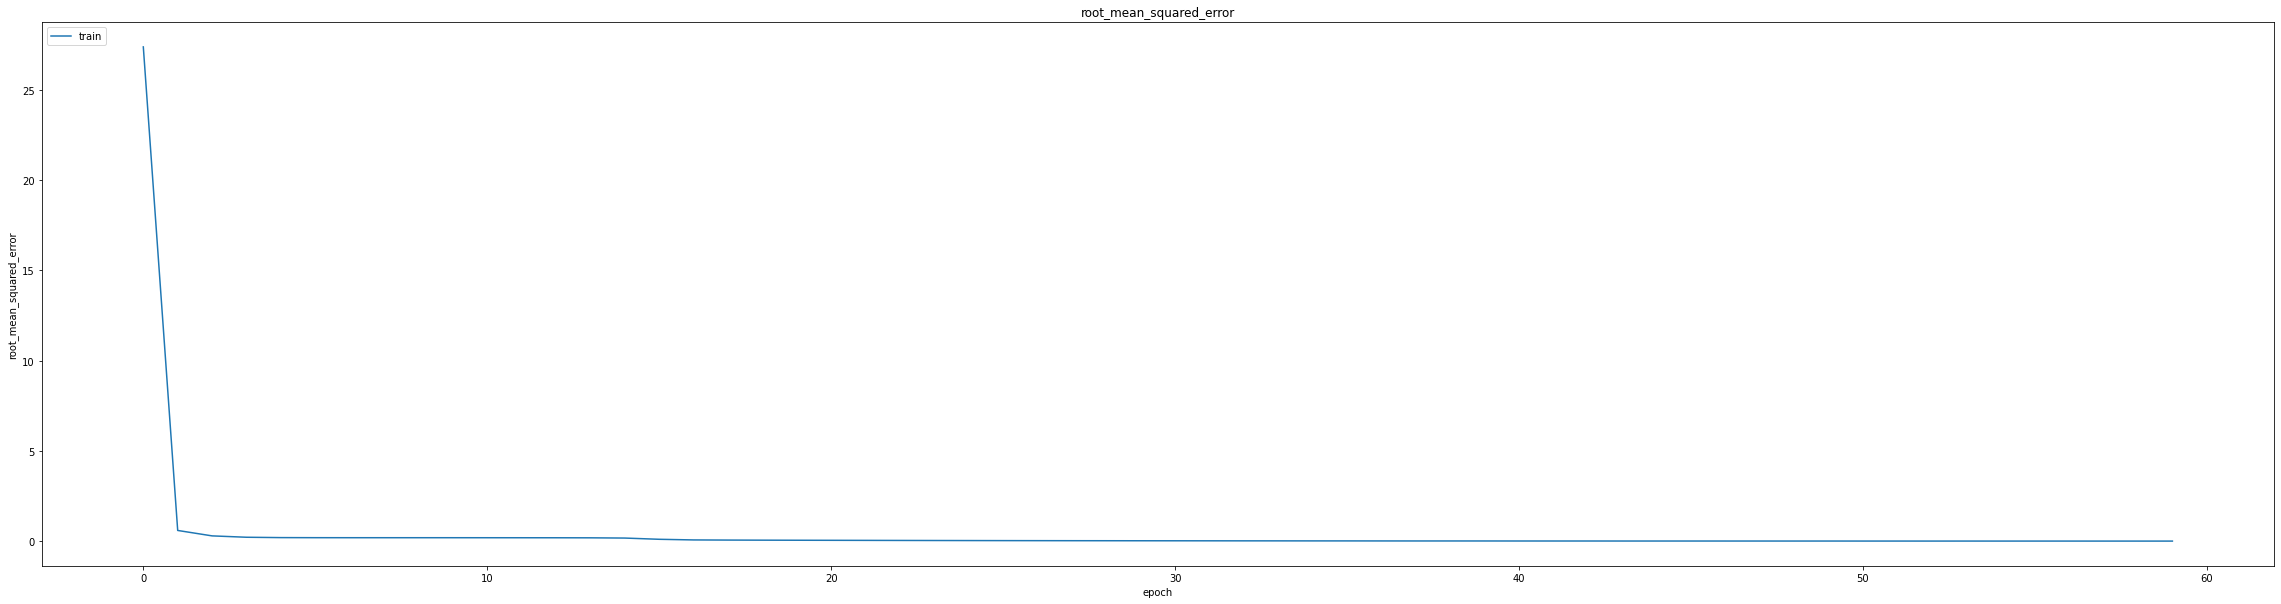

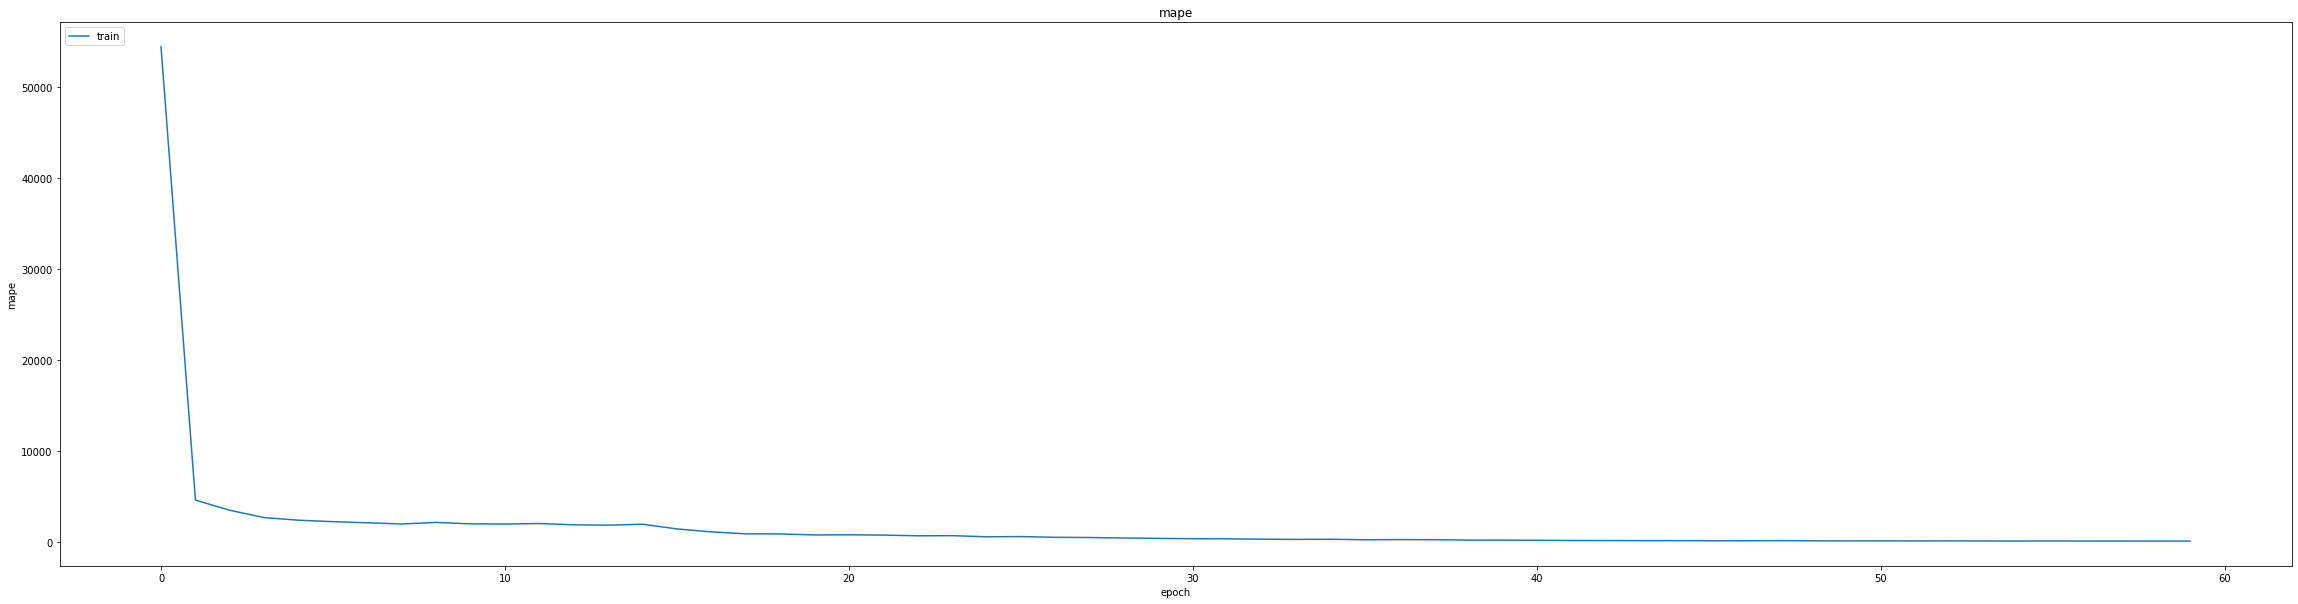

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.014553332701325417
0.02000606246292591
687/687 [==============================] - 18s 24ms/step
0.9898837901320381


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD5_LSTM")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(60/3)
Batch_size=385
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/20
463/463 [==============================] - ETA: 0s - loss: 0.0037 - mae: 0.0093 - mse: 0.0037 - root_mean_squared_error: 0.0608 - mape: 94.0315
Epoch 1: val_mse did not improve from 0.00023
463/463 [==============================] - 202s 428ms/step - loss: 0.0037 - mae: 0.0093 - mse: 0.0037 - root_mean_squared_error: 0.0608 - mape: 94.0315 - val_loss: 4.0695e-04 - val_mae: 0.0170 - val_mse: 4.0695e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 374.6306 - lr: 0.0010
Epoch 2/20
463/463 [==============================] - ETA: 0s - loss: 3.3365e-05 - mae: 0.0043 - mse: 3.3365e-05 - root_mean_squared_error: 0.0058 - mape: 63.9625
Epoch 2: val_mse did not improve from 0.00023
463/463 [==============================] - 195s 422ms/step - loss: 3.3365e-05 - mae: 0.0043 - mse: 3.3365e-05 - root_mean_squared_error: 0.0058 - mape: 63.9625 - val_loss: 4.1259e-04 - val_mae: 0.0172 - val_mse: 4.1259e-04 - val_root_mean_squared_error: 0.0203 - val_mape: 348.0261 - lr: 0.0010
lr chang

463/463 [==============================] - 208s 450ms/step - loss: 1.2819e-05 - mae: 0.0027 - mse: 1.2819e-05 - root_mean_squared_error: 0.0036 - mape: 66.0005 - val_loss: 2.2235e-04 - val_mae: 0.0126 - val_mse: 2.2235e-04 - val_root_mean_squared_error: 0.0149 - val_mape: 465.8178 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/20
463/463 [==============================] - ETA: 0s - loss: 1.2563e-05 - mae: 0.0026 - mse: 1.2563e-05 - root_mean_squared_error: 0.0035 - mape: 62.9729
Epoch 19: val_mse did not improve from 0.00022
463/463 [==============================] - 202s 436ms/step - loss: 1.2563e-05 - mae: 0.0026 - mse: 1.2563e-05 - root_mean_squared_error: 0.0035 - mape: 62.9729 - val_loss: 2.9139e-04 - val_mae: 0.0150 - val_mse: 2.9139e-04 - val_root_mean_squared_error: 0.0171 - val_mape: 462.3709 - lr: 3.8742e-04
Epoch 20/20
463/463 [==============================] - ETA: 0s - loss: 1.2581e-05 - mae: 0.0026 - mse: 1.2581e-05 - root_mean_squared_error: 0.0035 - mape

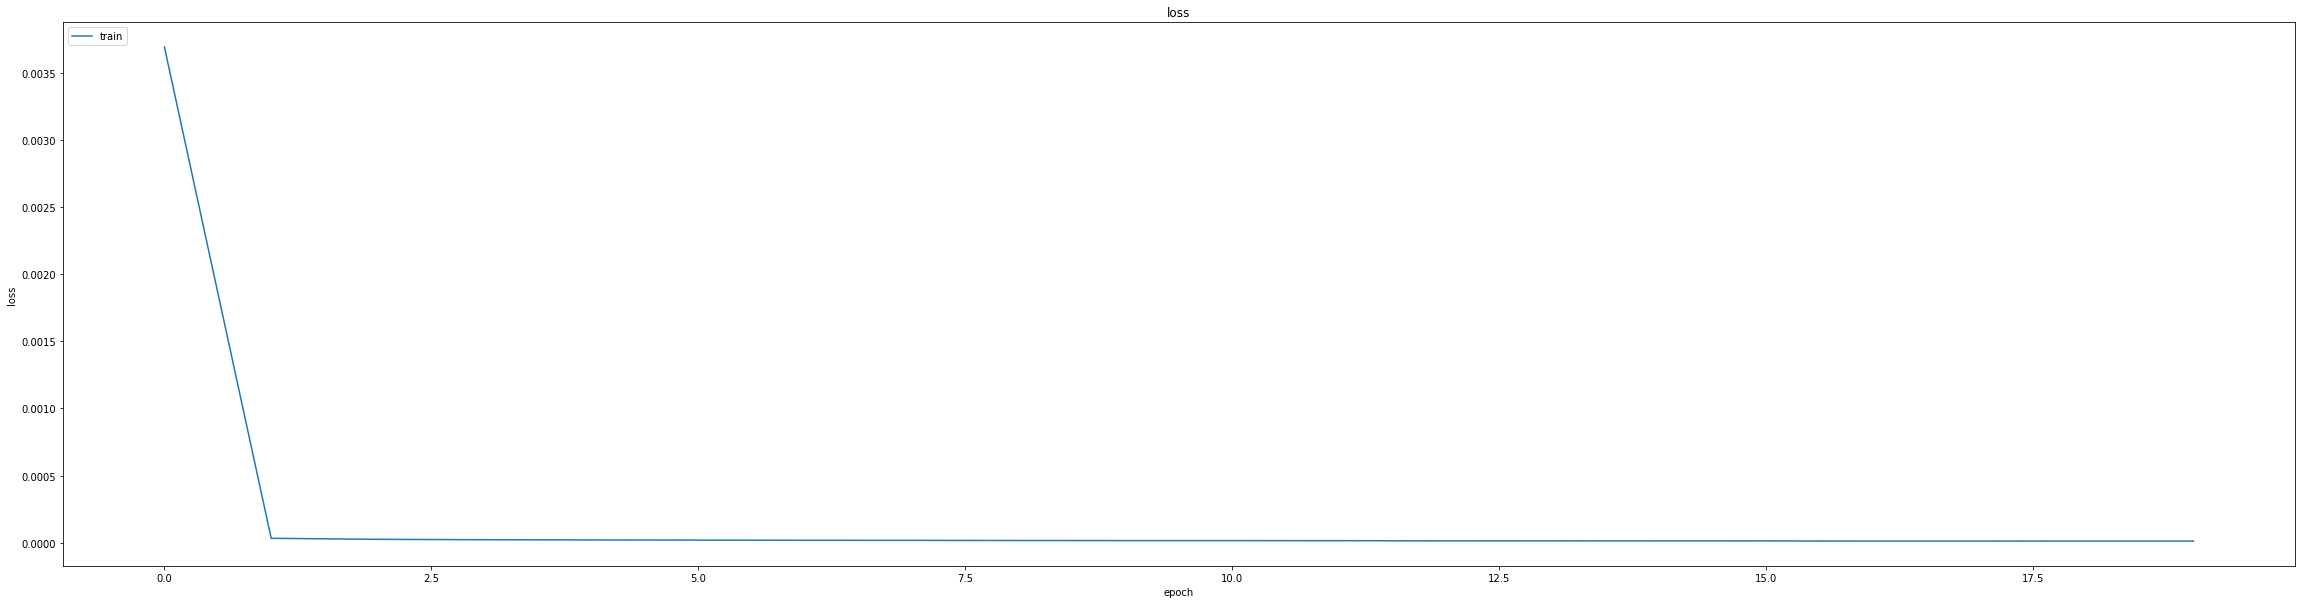

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01262013427913189
0.014911327511072159
687/687 [==============================] - 17s 24ms/step
0.9918110331187886


687/687 [==============================] - 16s 24ms/step


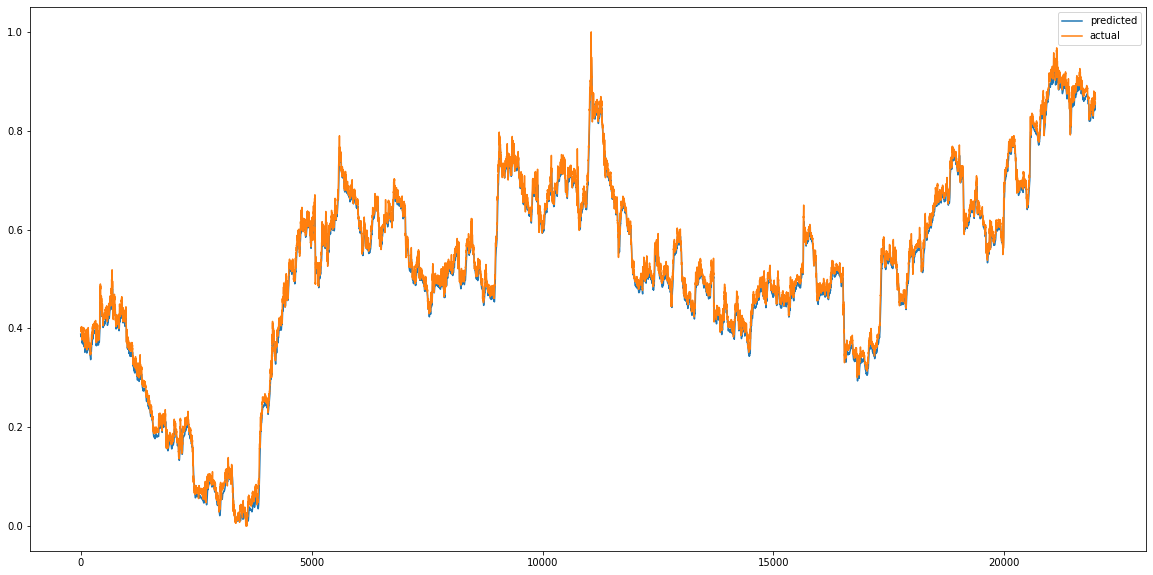

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CAD_USD5_LSTM")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


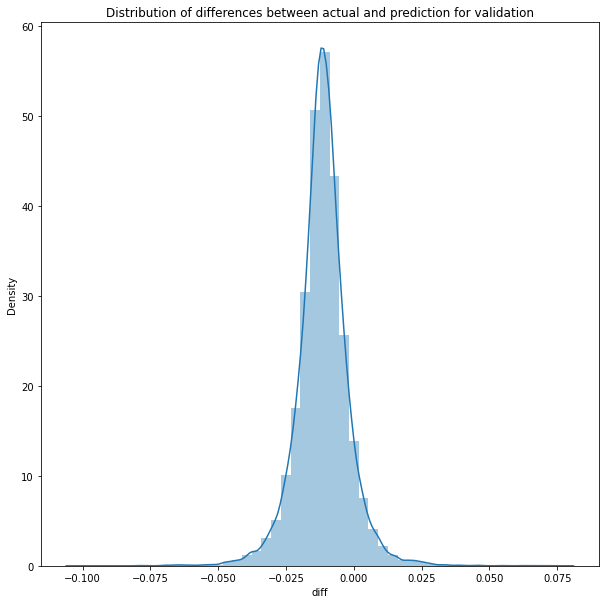

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

704/704 [==============================] - 17s 25ms/step


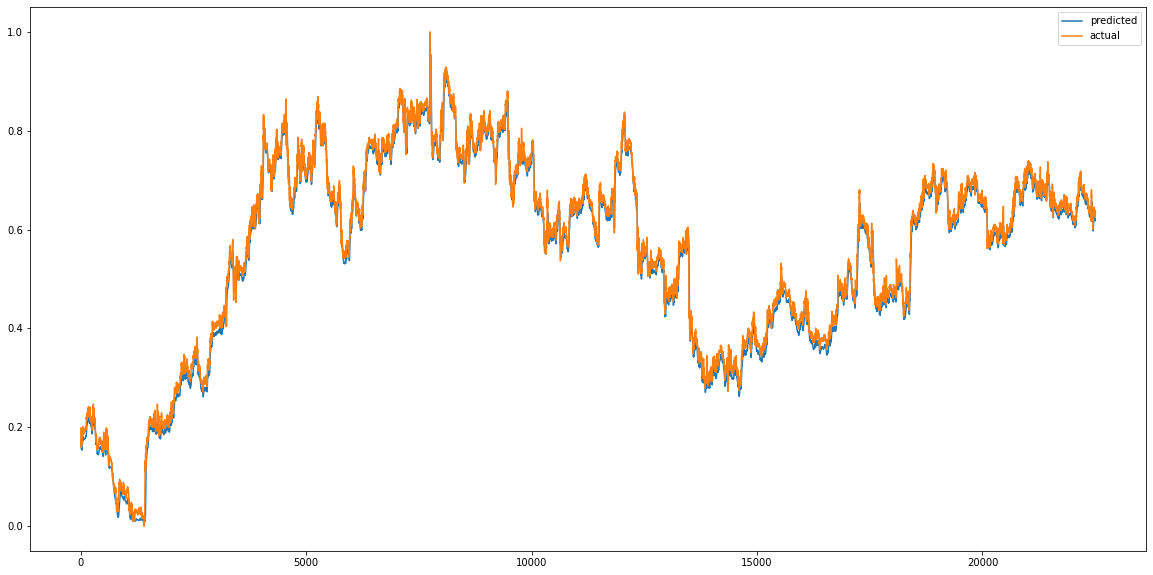

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


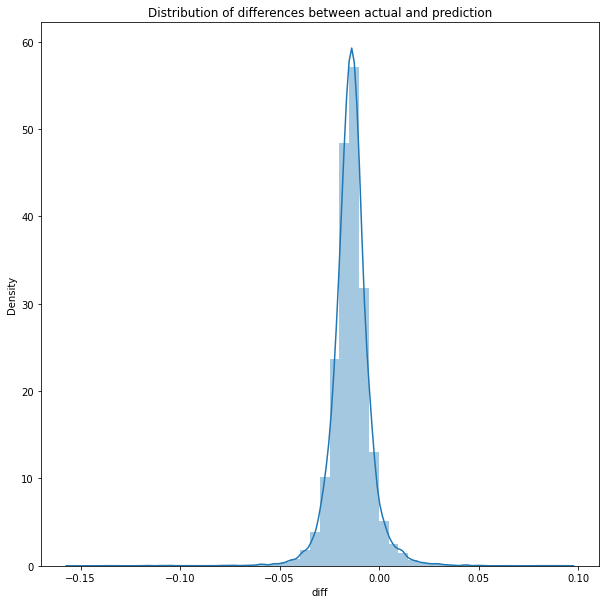

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0002924303859935492
MAE :  0.014905037579512137
RMSE  : 0.017100596071293807
704/704 [==============================] - 18s 25ms/step
R2_Score  : 0.9927647299588082


count    22505.000000
mean        -0.014032
std          0.009775
min         -0.153293
25%         -0.018673
50%         -0.014012
75%         -0.009490
max          0.093716
Name: diff, dtype: float64